In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pywt
from PIL import Image  
import PIL  
from skimage.io import imsave, imread

In [3]:
from dask import bag, diagnostics 
#import hvplot.pandas
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import shutil

import cv2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, zero_one_loss, classification_report
import seaborn as sns
from tensorflow import keras
import matplotlib.cm as cm
from IPython.display import Image, display

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from keras.layers import Input
from keras.layers import Convolution2D , concatenate ,Conv2D,Dense
from keras.layers import Activation,Dropout, GlobalAveragePooling2D,MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam ,SGD,RMSprop

In [5]:
import math
from keras.layers import MaxPool2D, concatenate, AveragePooling2D
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py
from keras.layers import Concatenate
import keras.backend as K
import keras
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler

In [6]:
import torch

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
print(device)

cuda:0


In [87]:
data_path = '/content/drive/MyDrive/Sem 2/CV/Sensors_data/Moisture'

In [88]:
classes = list(os.listdir('/content/drive/MyDrive/Sem 2/CV/Sensors_data/Moisture/'))
print(classes)

['Summer', 'Autumn', 'Winter', 'Spring']


In [89]:
directories = {
    'Winter': '/content/drive/MyDrive/Sem 2/CV/Sensors_data/Moisture/Winter/',
    'Spring': '/content/drive/MyDrive/Sem 2/CV/Sensors_data/Moisture/Spring/',
    'Autumn': '/content/drive/MyDrive/Sem 2/CV/Sensors_data/Moisture/Autumn/',
    'Summer': '/content/drive/MyDrive/Sem 2/CV/Sensors_data/Moisture/Summer/',}

In [19]:
# get image dimensions
def get_dims(file):
    img = cv2.imread(file)
    h,w = img.shape[:2]
    return h,w

100
[########################################] | 100% Completed | 33.50 s
76
[########################################] | 100% Completed | 36.06 s
66
[########################################] | 100% Completed | 31.75 s
100
[########################################] | 100% Completed | 3.71 s


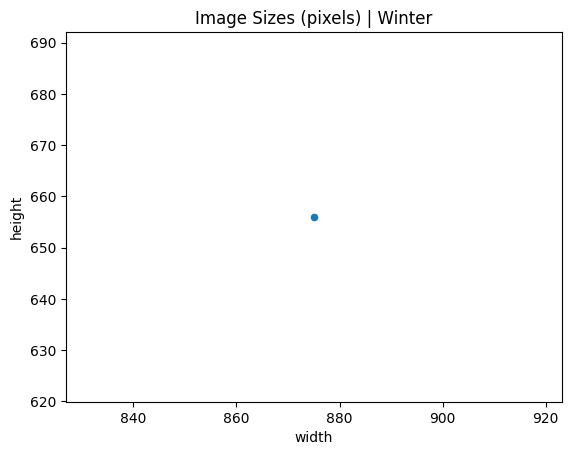

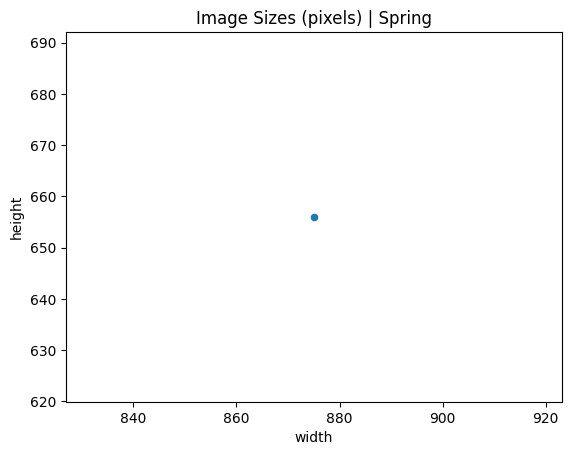

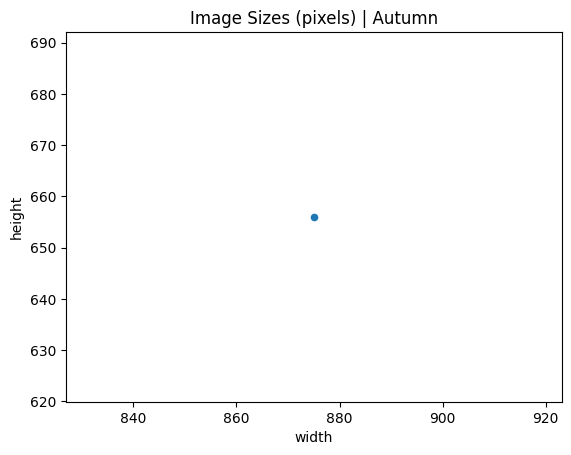

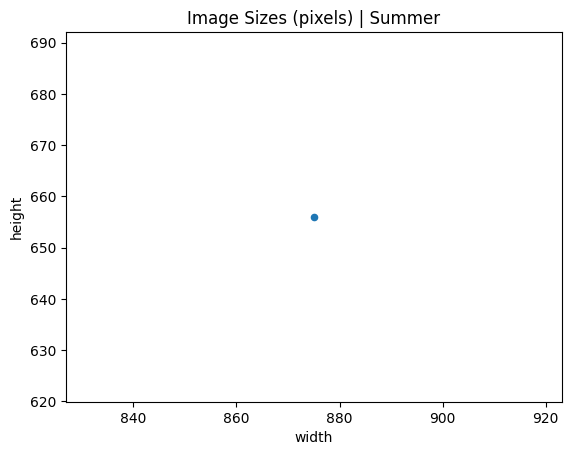

In [20]:
for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  print(len(filelist))
  dims = bag.from_sequence(filelist).map(get_dims)
  with diagnostics.ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

# **Scolograms**

In [90]:

def plot_samples(dir, label):
  from tensorflow.keras.preprocessing import image

  fig = plt.figure(figsize = (8,6))
  filelist = [filepath + f for f in os.listdir(dir)]
  files = np.random.choice(filelist, 6, replace = False)
  plt.title(label)
  plt.axis('off')

  for i in range(6):
      ax = fig.add_subplot(2, 3, i+1)
      fn = image.load_img(files[i], target_size = (100,100))
      plt.imshow(fn)
      plt.axis('off')
  plt.show()

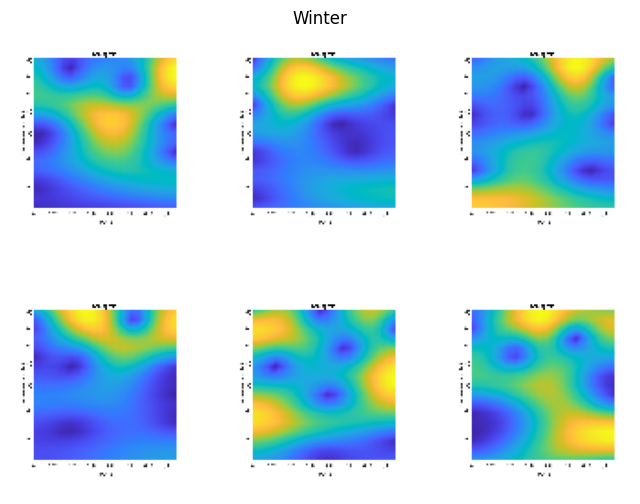

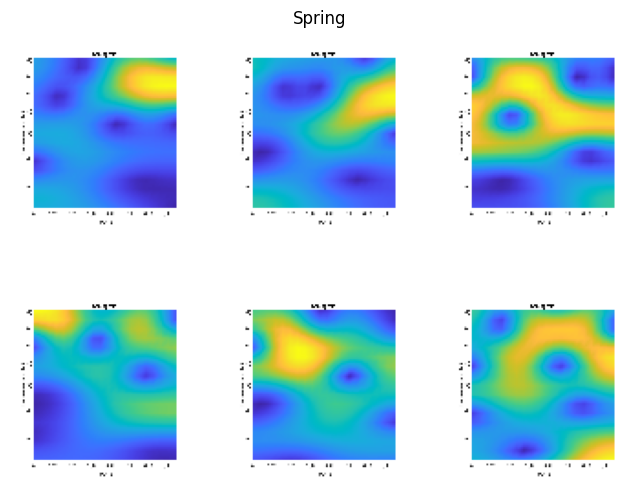

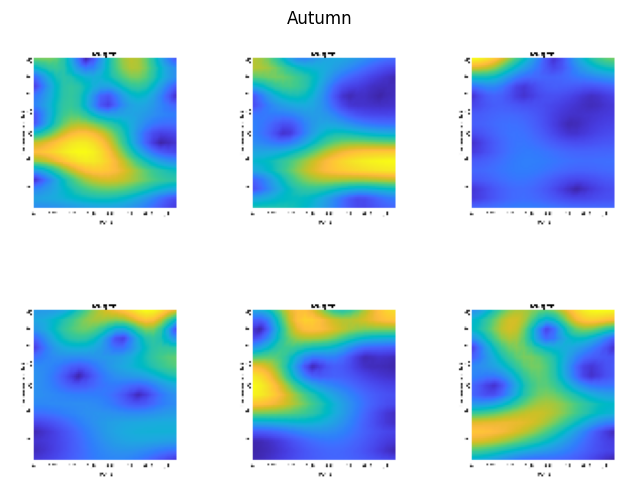

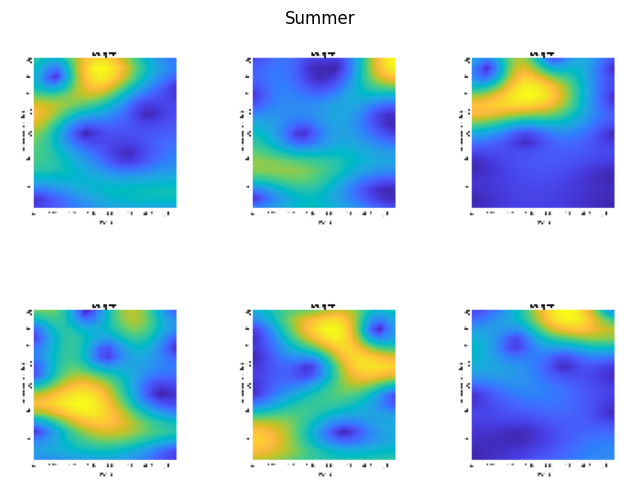

In [91]:
for n,dir in directories.items():
  plot_samples(d,n)

In [57]:
import PIL.Image

def cs_images(path,img_shape, classes):
    imag = []
    label = []
    for i in classes:
        l1 = os.listdir(path+'/'+i)
        for j in l1:
            img = PIL.Image.open(path+'/'+i+'/'+j)
            img = img.resize(size = (img_shape[0], img_shape[0]))
            img = img.convert('RGB')
            #img = img.convert('L')
            #img = img.reshape(50,50,1)
            #img = img.flatten()
            img = cv2.imread(path+'/'+i+'/'+j)
            img = cv2.resize(img,(img_shape[0],img_shape[1]),3)
            #img = np.array(img).reshape(img_shape)
            #img = img.reshape(img_shape)
            imag.append(img)
            label.append(classes.index(i))
            del(img)
    # %matplotlib inline 
    # plt.figure(figsize=(10, 10))
    # for i in range(20):
    #     plt.subplot(5,4,i+1)
    #     plt.imshow(imag[i])
    #     plt.axis('off')
    # plt.show()
    return np.array(imag),label

In [58]:
IMG_SIZE = 224

In [92]:
x,y = cs_images(data_path,(IMG_SIZE, IMG_SIZE, 1),classes)

In [93]:
y = pd.Series(y)

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.2,
                                                 random_state = 12,
                                                 shuffle = True)

In [95]:
x_train.shape

(273, 224, 224, 3)

In [96]:
y_train[:10]

11     0
101    1
293    3
37     0
236    2
144    1
3      0
333    3
243    2
14     0
dtype: int64

In [97]:
y_train.shape

(273,)

In [98]:
x_test.shape

(69, 224, 224, 3)

In [99]:
y_test.shape

(69,)

In [100]:
IMG_SIZE = 224

# VGG

In [101]:
from glob import glob 
from tensorflow.keras.layers import Lambda
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [102]:

IMAGE_SIZE = [224, 224] 

In [103]:
#Create a VGG16 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
#vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #Training with Imagenet weights
# Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 


vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
x = Dropout(0.3)(x)
x = Dense(30, activation='relu')(x)
prediction = Dense(len(classes), activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes
#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [104]:
base_model = VGG19(input_shape=(IMG_SIZE,IMG_SIZE,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(len(classes), activation='softmax'))

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_7 (Dropout)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                                 
Total params: 23,236,292
Trainable params: 10,291,332


In [106]:
#opt = keras.optimizers.Adam(learning_rate=0.01)
opt = tf.keras.optimizers.experimental.SGD(0.01, momentum=0.01, clipnorm = 1)
#Compile the model 
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer= opt, 
              metrics=['sparse_categorical_accuracy']) 

In [107]:
history = model.fit(x_train,
                    y_train,
                    epochs= 15,
                    validation_data = (x_test,y_test),
                    verbose = 1,
                    #callbacks = [es],
                    batch_size=32)

Epoch 1/15
9/9 [==============================] - 7s 582ms/step - loss: 7.4810 - sparse_categorical_accuracy: 0.3077 - val_loss: 3.1924 - val_sparse_categorical_accuracy: 0.2609
Epoch 2/15
9/9 [==============================] - 2s 194ms/step - loss: 4.5810 - sparse_categorical_accuracy: 0.2747 - val_loss: 1.9738 - val_sparse_categorical_accuracy: 0.3333
Epoch 3/15
9/9 [==============================] - 2s 196ms/step - loss: 2.7230 - sparse_categorical_accuracy: 0.3077 - val_loss: 2.0285 - val_sparse_categorical_accuracy: 0.2464
Epoch 4/15
9/9 [==============================] - 2s 236ms/step - loss: 1.9510 - sparse_categorical_accuracy: 0.3223 - val_loss: 1.7122 - val_sparse_categorical_accuracy: 0.3043
Epoch 5/15
9/9 [==============================] - 2s 236ms/step - loss: 1.6862 - sparse_categorical_accuracy: 0.3223 - val_loss: 1.5115 - val_sparse_categorical_accuracy: 0.3623
Epoch 6/15
9/9 [==============================] - 2s 240ms/step - loss: 1.3749 - sparse_categorical_accuracy: 

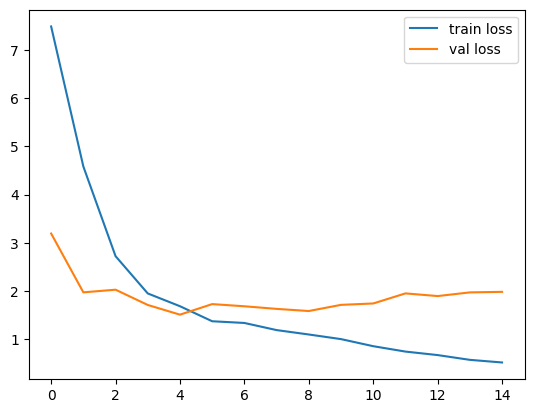

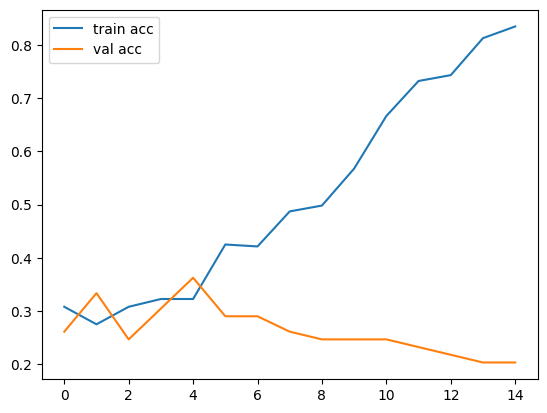

In [108]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
 
 # accuracies
plt.plot(history.history['sparse_categorical_accuracy'], label='train acc')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val acc')
plt.legend()
plt.show()

In [110]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Sem 2/CV/Saved_models/moisture_data_vgg19.h5')

In [111]:
y_pred = np.argmax(model.predict(x_test),axis=1)

3/3 [==============================] - 1s 167ms/step


In [112]:
y_pred[0:5]

array([1, 1, 1, 0, 2])

In [113]:
list(y_test[0:5])

[2, 2, 1, 3, 3]

In [114]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 94ms/step - loss: 1.9839 - sparse_categorical_accuracy: 0.2029


[1.9838541746139526, 0.2028985470533371]

In [115]:
print(classes)
# print(y_test[:25], '\n')
# print(y_pred[:25], '\n')

# predict = []
# for i in range(3000): #len(y_pred)
#   predict.append(np.argmax(y_pred[i]))

# print(predict[:25], '\n')

cm = confusion_matrix(y_test, y_pred)
print(cm, '\n')

zol = zero_one_loss(y_test, y_pred, normalize = False)
print(zol, '\n')

cr = classification_report(y_test, y_pred)
print(cr)

['Summer', 'Autumn', 'Winter', 'Spring']
[[7 4 8 1]
 [4 2 4 0]
 [8 3 4 1]
 [9 4 9 1]] 

55 

              precision    recall  f1-score   support

           0       0.25      0.35      0.29        20
           1       0.15      0.20      0.17        10
           2       0.16      0.25      0.20        16
           3       0.33      0.04      0.08        23

    accuracy                           0.20        69
   macro avg       0.22      0.21      0.18        69
weighted avg       0.24      0.20      0.18        69



<Figure size 500x500 with 0 Axes>

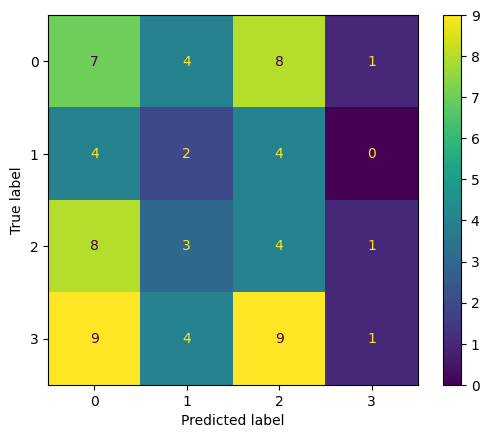

In [116]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()